# Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Matplotlib Default Parameter

from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# display all columns
pd.set_option('max_columns', 100)

# Read Data

In [ ]:
# Mounting to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path = '/content/drive/MyDrive/Rakamin/Final Project - Datskuyy/HW Unsupervised /flight.csv'
df = pd.read_csv(path)

df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check Number of Rows & Features

print('Total Rows :', df.shape[0])
print('Total Features :', df.shape[1])

Total Rows : 62988
Total Features : 23


# Exploratory Data Analysis

In [ ]:
# Create Data Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,MEMBER_NO,int64,0,0.000000,62988,"[54993, 28065, 55106, 21189]"
1,FFP_DATE,datetime64[ns],0,0.000000,3068,"[2006-11-02T00:00:00.000000000, 2007-02-19T00:..."
2,FIRST_FLIGHT_DATE,datetime64[ns],0,0.000000,3406,"[2008-12-24T00:00:00.000000000, 2007-08-03T00:..."
3,GENDER,object,3,0.004763,2,"[Male, Female, nan]"
4,FFP_TIER,int64,0,0.000000,3,"[6, 5, 4]"
5,WORK_CITY,object,2269,3.602273,3234,"[., nan, Los Angeles, guiyang]"
6,WORK_PROVINCE,object,3248,5.156538,1165,"[beijing, CA, guizhou, guangdong]"
7,WORK_COUNTRY,object,26,0.041278,118,"[CN, US, FR, AN]"
8,AGE,float64,420,0.666794,84,"[31.0, 42.0, 40.0, 64.0]"
9,LOAD_TIME,object,0,0.000000,1,[3/31/2014]


Missing values in `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK COUNTRY`, `Age`, `SUM_YR_1`, and `SUM_YR_2`

## Descriptive Statistic

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


- `AGE` column has extreme incorect values and it will be removed in pre processing

In [ ]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [ ]:
# Grouping Features Based on Their Data Type

num = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cat = df.select_dtypes(exclude=[np.number]).columns

## Univariate Analysis

### Numerical Features Analysis

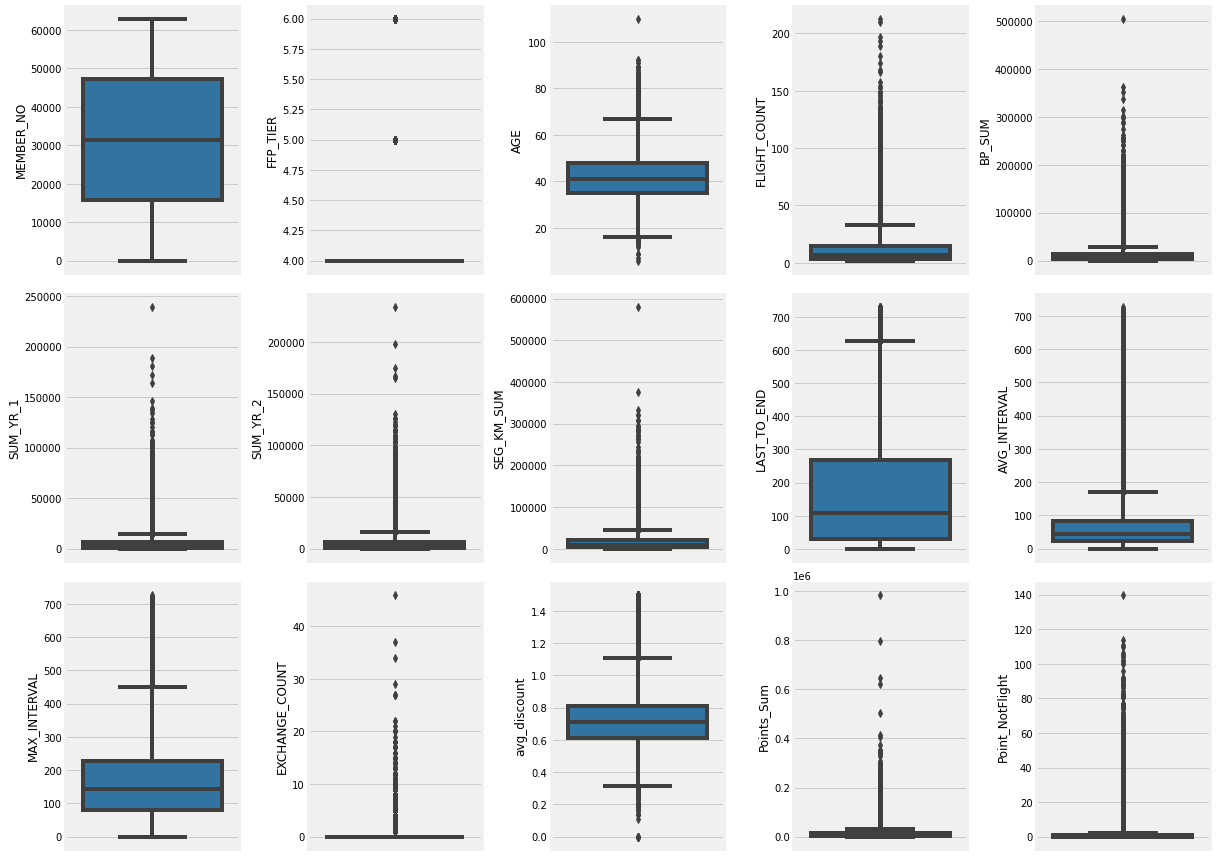

In [ ]:
# Create Boxplot for Each Numerical Feature

fig, axes = plt.subplots(3, 5, figsize=(17,12))
xy = [(0,0), (0,1), (0,2), (0,3), (0,4), 
      (1,0), (1,1), (1,2), (1,3), (1,4),
      (2,0), (2,1), (2,2), (2,3), (2,4)]

for i in range(len(num)):
  sns.boxplot(y=df[num[i]], ax=axes[xy[i]])
  plt.tight_layout()

- `FFP_TIER` has few unique values, and from this boxplot we will consider it as no outlier feature
- Most of the features are right-skewed and have some extreme features

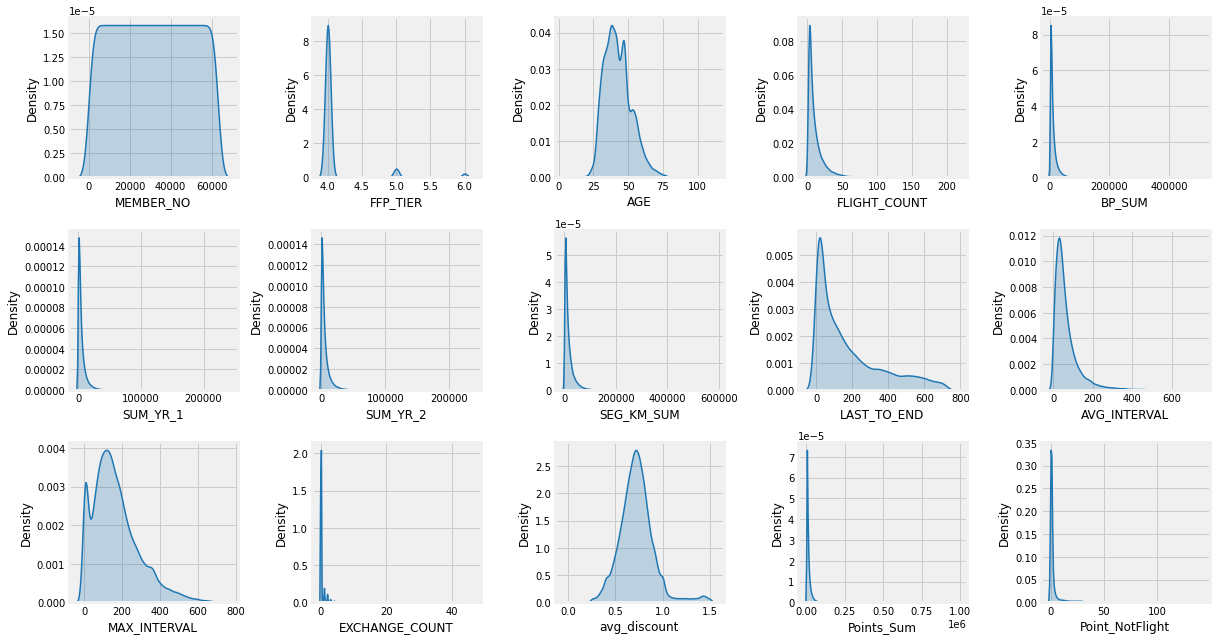

In [ ]:
# Create Distplot for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[num[i]], linewidth=1.5, shade=True)
    plt.xlabel(num[i])
    plt.tight_layout()

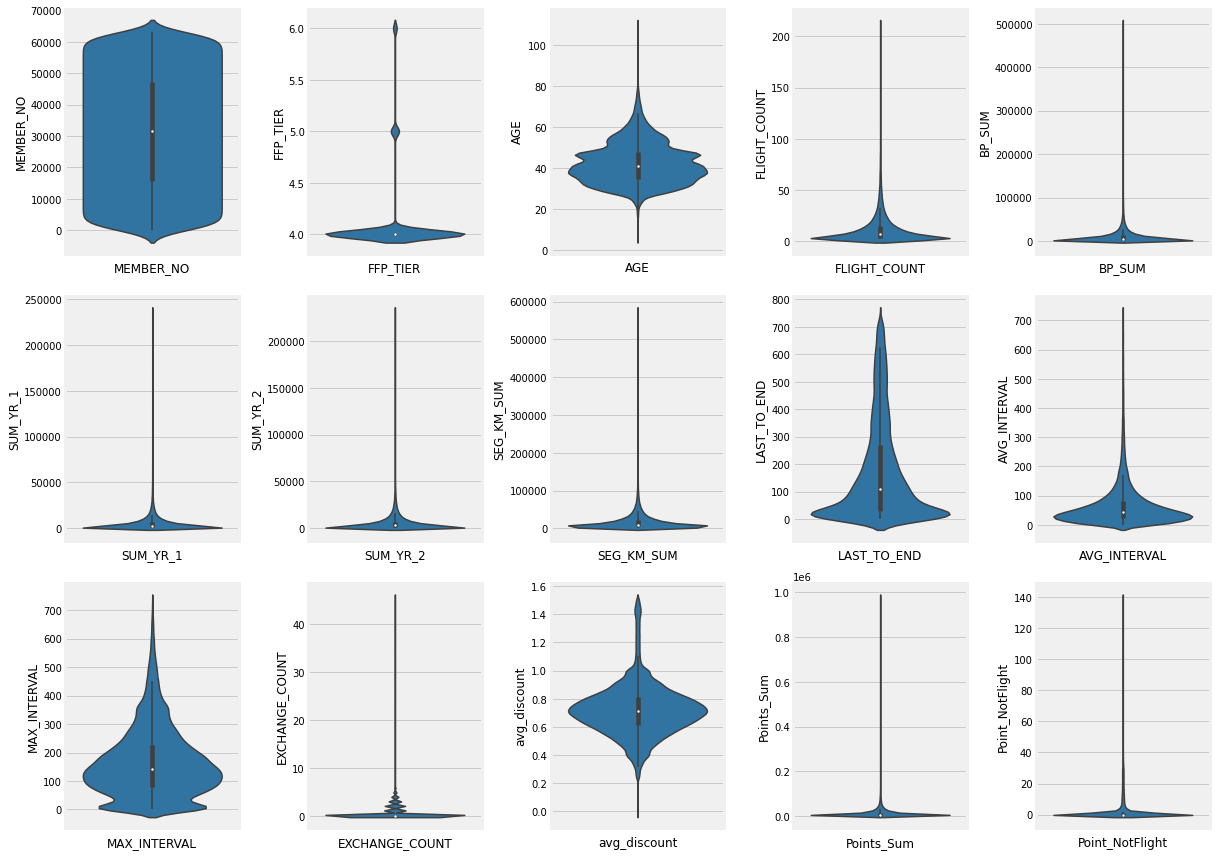

In [ ]:
# Create Violinplot for Each Numerical Feature

plt.figure(figsize=(17,12))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df[num[i]], linewidth=1.5)
    plt.xlabel(num[i])
    plt.tight_layout()

### Categorical Feature Analysis

In [ ]:
df[cat].nunique()

FFP_DATE             3068
FIRST_FLIGHT_DATE    3406
GENDER                  2
WORK_CITY            3234
WORK_PROVINCE        1165
WORK_COUNTRY          118
LOAD_TIME               1
LAST_FLIGHT_DATE      731
dtype: int64

- `FFP_DATE`, `FIRST_FLIGHT_DATE`, and `LAST_FLIGHT_DATE` will be converted into datetime datatypes

# Multivariate Analysis

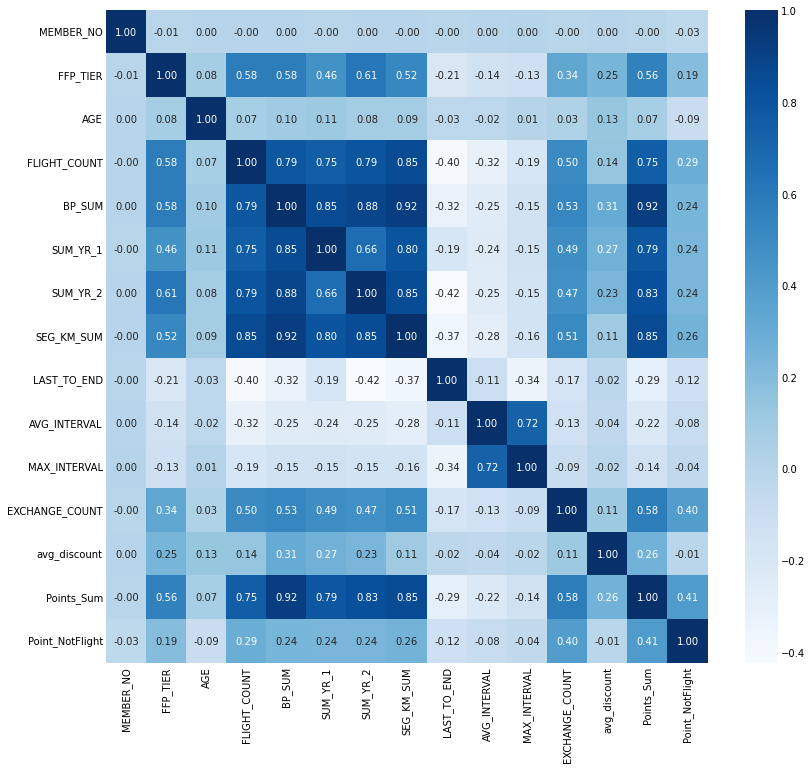

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

- `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, and `SEG_KM_SUM` correlated each other
- `AVG_INTERVAL` and `MAX_INTERVAL` correlated each other
-  `Points_Sum` correlated with `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR1`, `SUM_YR_2`, and `SEG_KM_SUM`

# Data Preprocessing

## Feature Engineering

In [ ]:
# change datetime datatype
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')

## Handling Missing Values

In [ ]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

- missing values in `WORK_CITY`, `WORK_PROVINCE`, and `WORK_COUNTRY` will be dropped because they have a lot unique values and considered as categoric, so we can't impute them with mode()
- We will inpute `AGE` with Median
- We will inpute `SUM_YR_1` and `SUM_YR_2` with min() values zero
- Missing values in `LAST_FLIGHT_DAY_NAME`, `LAST_FLIGHT_DAY_MONTH`, `LAST_FLIGHT_MONTH`, and `LAST_FLIGHT_DAY_YEAR` will be dropped

In [ ]:
# missing values inputation
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].min())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_1'].min())
df['AGE'] = df['AGE'].fillna(df['AGE'].median())

# drop missing values
df = df.dropna()

In [ ]:
df.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [ ]:
df.shape

(58840, 31)

## Outlier Handling

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,58840.0,31548.411132,18173.767328,3.0,15819.750000,31602.000000,47294.250000,62988.0
FFP_TIER,58840.0,4.103484,0.376417,4.0,4.000000,4.000000,4.000000,6.0
AGE,58840.0,42.208498,9.734430,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,58840.0,11.922502,14.178012,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,58840.0,10936.202549,16243.618248,0.0,2526.000000,5711.500000,12837.250000,505308.0
SUM_YR_1,58840.0,5299.702311,8079.481259,0.0,960.000000,2745.000000,6510.000000,239560.0
SUM_YR_2,58840.0,5610.479487,8709.893062,0.0,768.000000,2769.000000,6850.000000,234188.0
SEG_KM_SUM,58840.0,17153.284330,20912.490084,368.0,4760.000000,10032.000000,21313.000000,580717.0
LAST_TO_END,58840.0,175.777821,183.476641,1.0,29.000000,108.000000,267.000000,731.0
AVG_INTERVAL,58840.0,67.529382,77.370440,0.0,23.269231,44.466667,81.762500,728.0


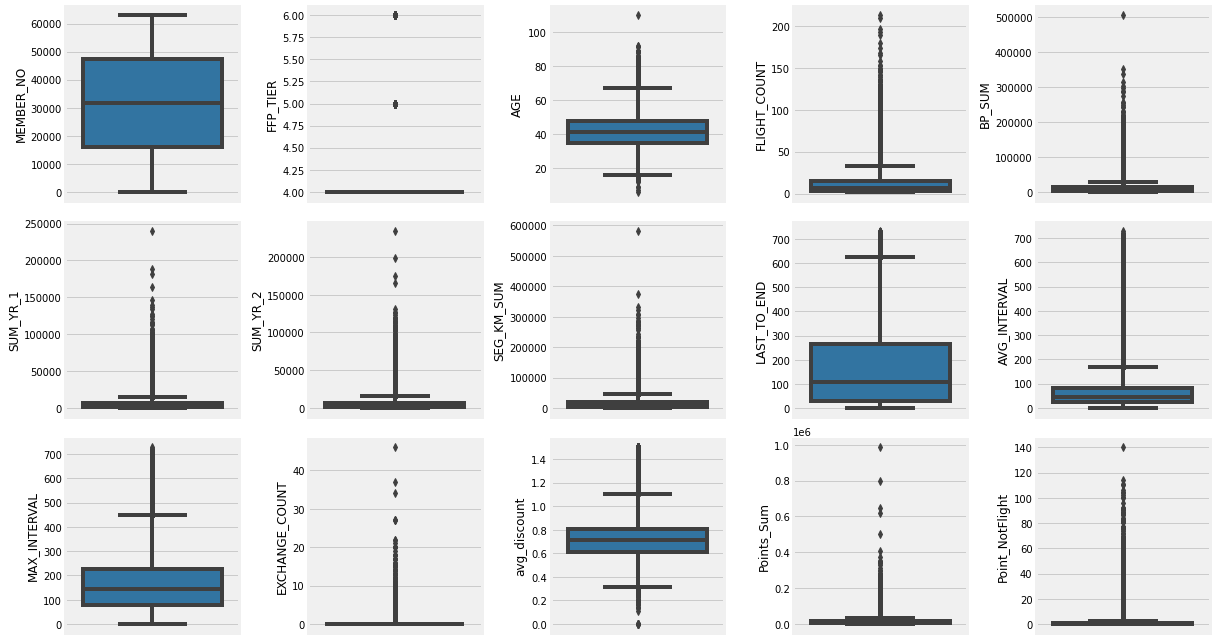

In [ ]:
# Create Boxplot for Each Numerical Feature

fig, axes = plt.subplots(3, 5, figsize=(17,9))
xy = [(0,0), (0,1), (0,2), (0,3), (0,4), (1,0), (1,1), (1,2), (1,3), (1,4), (2,0), (2,1), (2,2), (2,3), (2,4)]

for i in range(len(num)):
  sns.boxplot(y=df[num[i]], ax=axes[xy[i]])
  plt.tight_layout()

- We will remove extreme values in `AGE` and `SEG_KM_SUM` 

In [ ]:
outlier_col = ['AGE', 'FLIGHT_COUNT', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM']

In [ ]:
from scipy import stats
import numpy as np

# Handling Outlier using Z-score

print(f'Total Rows Before Outlier Handling = {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier_col:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df = df[filtered_entries] 

print(f'Total Rows Before Outlier Handling = {len(df)}')

Total Rows Before Outlier Handling = 58840
Total Rows Before Outlier Handling = 56094


## Feature Selection

We will analyze customer member value analysis using LRFMC analysis. LRFMC analysis is an extended version of RFM analysis that has been used in the aviation industry for years to divide customers into segments. Based on LRFMC analysis we will need 5 variables:

- L : The number of months since the member’s joining time from the end of the observation time. => LOAD_DATE - FFP_DATE

- R : Number of months since the member’s last flight from the end of observation time. => LAST_TO_END

- F : The total number of times the member has flown during the observation period. => FLIGHT_COUNT

- M : Miles accumulated during member observation time. => SEG_KM_SUM

- C : The average value of the discount factor used by the member during the observation period. => avg_discount

In [ ]:
# find L
df['L'] = df['LOAD_TIME'] - df['FFP_DATE']

# filter LRFMC feature
data = df[['L', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]

# rename column
data.columns = ['L','R','F','M','C']
data.head()

,L,R,F,M,C
725,1046 days,83,27,55673,1.429267
904,2084 days,11,52,54902,1.346143
984,649 days,86,11,79822,0.892702
994,1560 days,5,40,56236,1.264161
995,2134 days,2,46,51348,1.384300


In [ ]:
# check data types
data.dtypes

L    timedelta64[ns]
R              int64
F              int64
M              int64
C            float64
dtype: object

In [ ]:
# convert L datetime to integer
data['L'] = data['L'].astype(str).str.split().str[0]
data['L'] = data['L'].astype(int)

# re check data types
data.dtypes

L      int64
R      int64
F      int64
M      int64
C    float64
dtype: object

In [ ]:
data.head()

,L,R,F,M,C
725,1046,83,27,55673,1.429267
904,2084,11,52,54902,1.346143
984,649,86,11,79822,0.892702
994,1560,5,40,56236,1.264161
995,2134,2,46,51348,1.384300


## Feature Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_data = StandardScaler()
data_std = sc_data.fit_transform(data)

In [ ]:
data_std = pd.DataFrame(data_std, columns=data.columns)
data_std.head()

,L,R,F,M,C
0,-0.473758,-0.533689,1.761026,3.056277,3.985130
1,0.775385,-0.924613,4.362663,2.999352,3.521854
2,-0.951512,-0.517400,0.095979,4.839262,0.994694
3,0.144797,-0.957190,3.113877,3.097845,3.064949
4,0.835556,-0.973478,3.738270,2.736951,3.734519


# Clustering: K-means

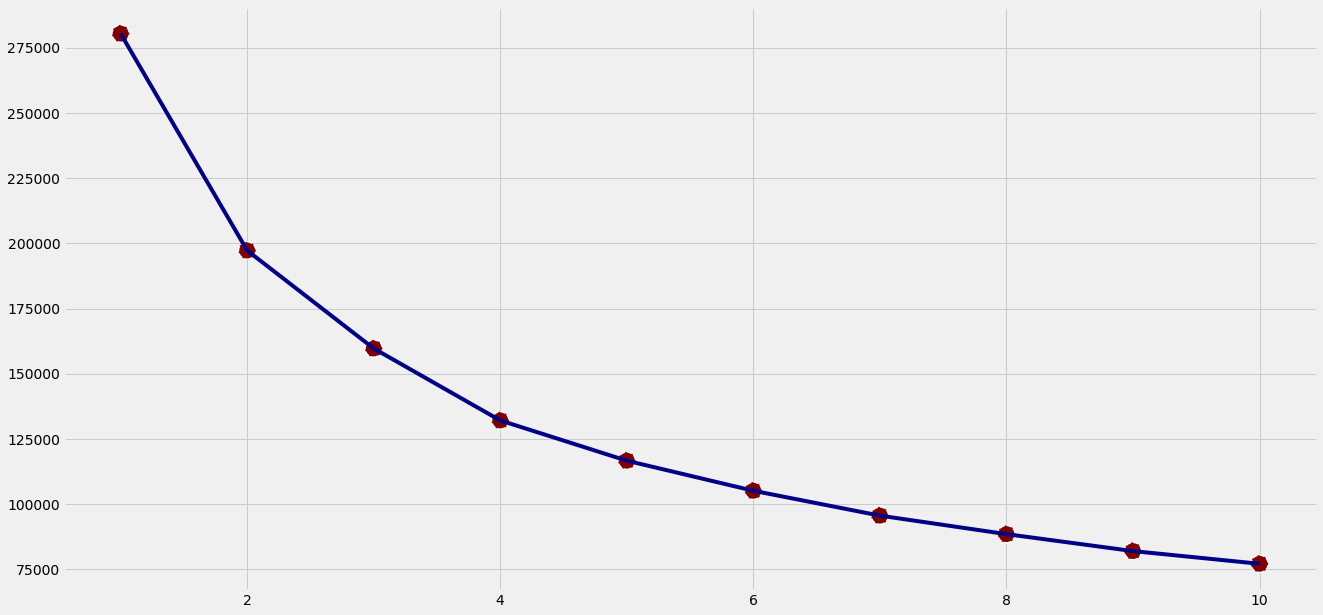

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))

# plt.plot(inertia)
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)

# fit model 
kc = kmeans.fit(data_std.values)
cluster_labels = kc.labels_

# add cluster
data_cluster = data_std.assign(K_Cluster = cluster_labels)
data_cluster.head()

,L,R,F,M,C,K_Cluster
0,-0.473758,-0.533689,1.761026,3.056277,3.985130,0
1,0.775385,-0.924613,4.362663,2.999352,3.521854,0
2,-0.951512,-0.517400,0.095979,4.839262,0.994694,0
3,0.144797,-0.957190,3.113877,3.097845,3.064949,0
4,0.835556,-0.973478,3.738270,2.736951,3.734519,0


In [ ]:
# add label to 'data' dataframe
data_label = data.assign(K_Cluster = cluster_labels)
data_label.head()

,L,R,F,M,C,K_Cluster
725,1046,83,27,55673,1.429267,0
904,2084,11,52,54902,1.346143,0
984,649,86,11,79822,0.892702,0
994,1560,5,40,56236,1.264161,0
995,2134,2,46,51348,1.384300,0


# PCA

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(data_cluster)
pcs = pca.transform(data_cluster)

In [ ]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = data_cluster['K_Cluster']
data_pca.sample(10, random_state=123)

,PC 1,PC 2,cluster
3858,2.602140,0.120937,0
22350,0.326718,1.810669,1
2674,2.020208,-0.948764,0
6360,2.125847,-0.836877,0
31313,-1.284132,-0.565688,3
55741,-1.959822,-0.947539,3
51854,-1.698875,0.775120,2
6437,2.664930,0.821711,0
36125,0.145934,1.080730,1
26790,0.123262,1.056749,1


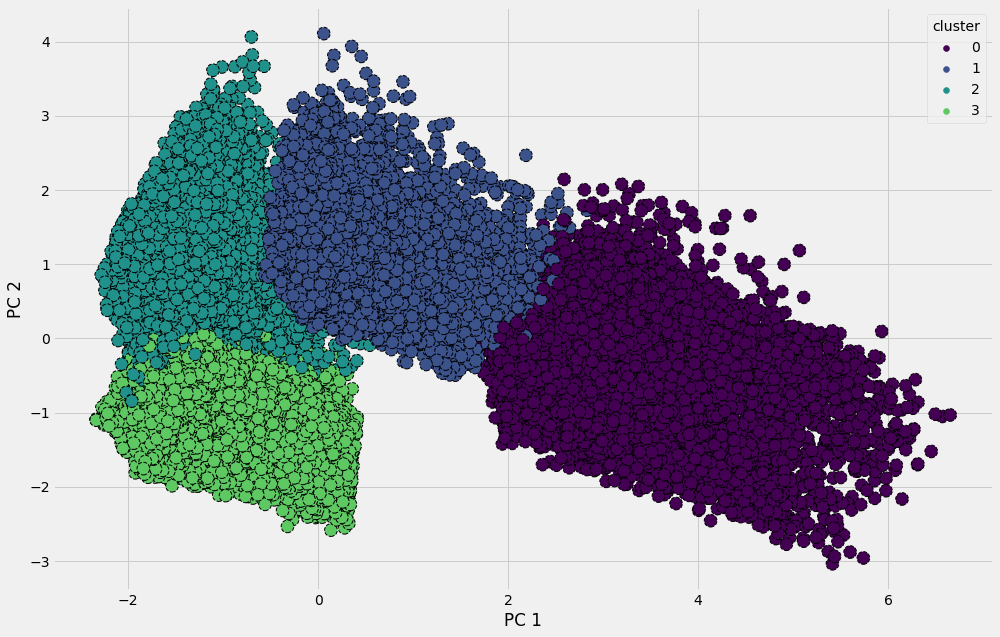

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['#440154','#3b528b','#21918c','#5ec962'],
    s=160,
    ax=ax
)

# Model Analysis

## Distribution Analysis

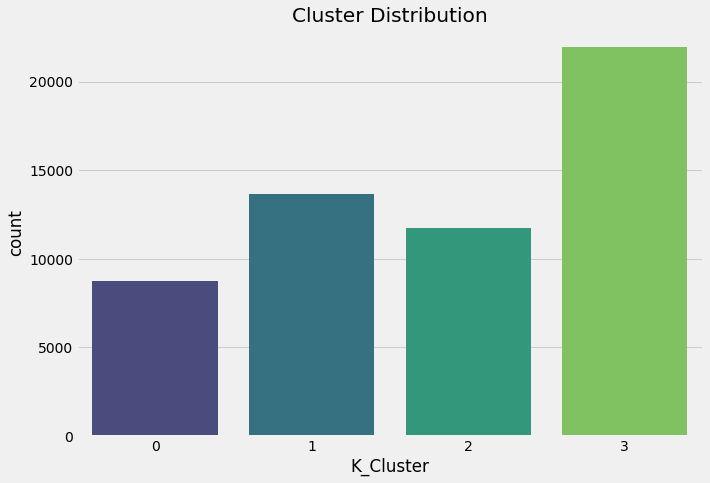

In [ ]:
plt.figure(figsize=(10,7))
pl = sns.countplot(x = data_label['K_Cluster'], palette='viridis')
pl.set_title('Cluster Distribution')
plt.show()

## LRFMC

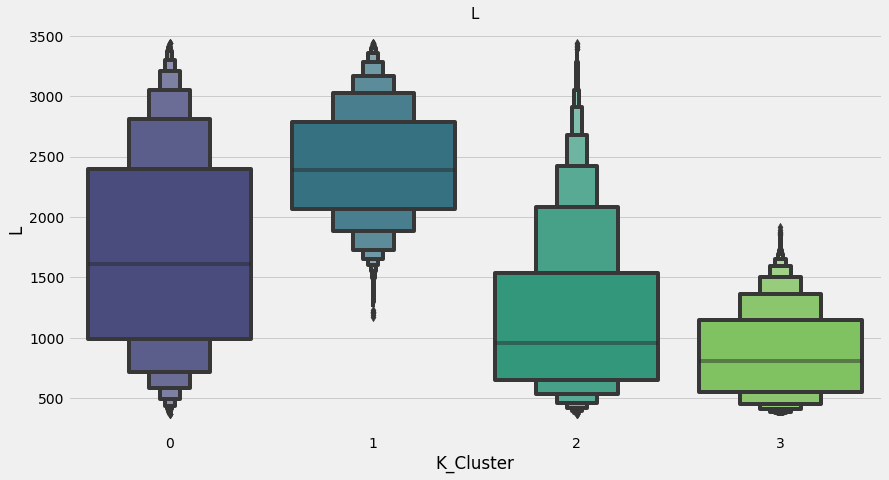

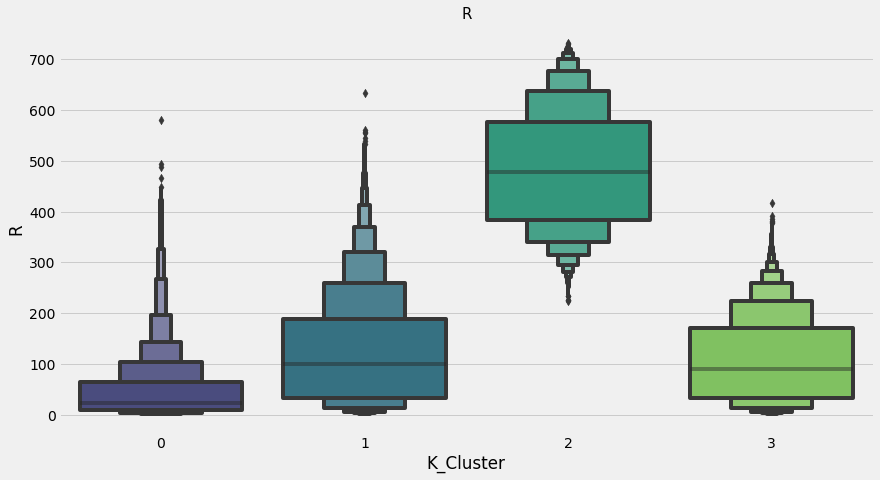

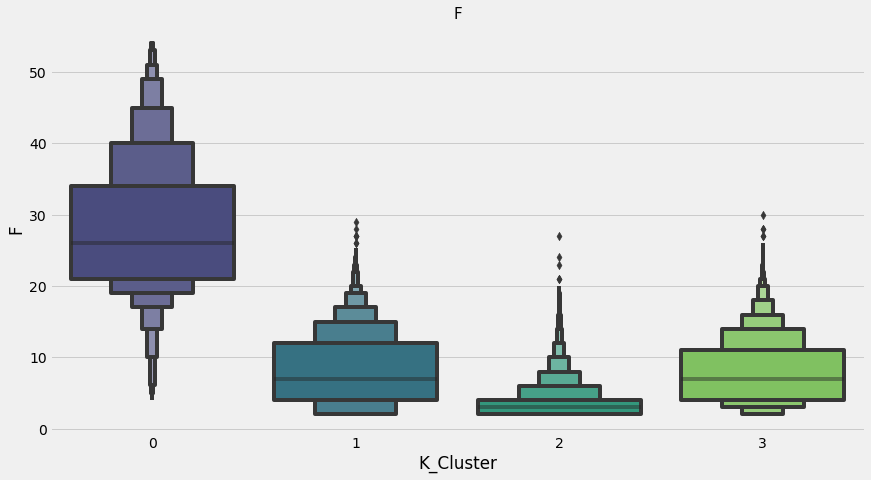

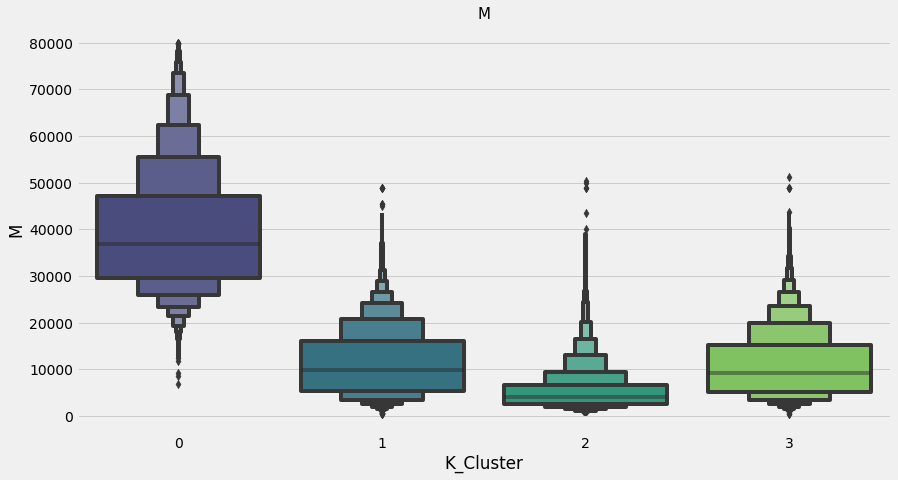

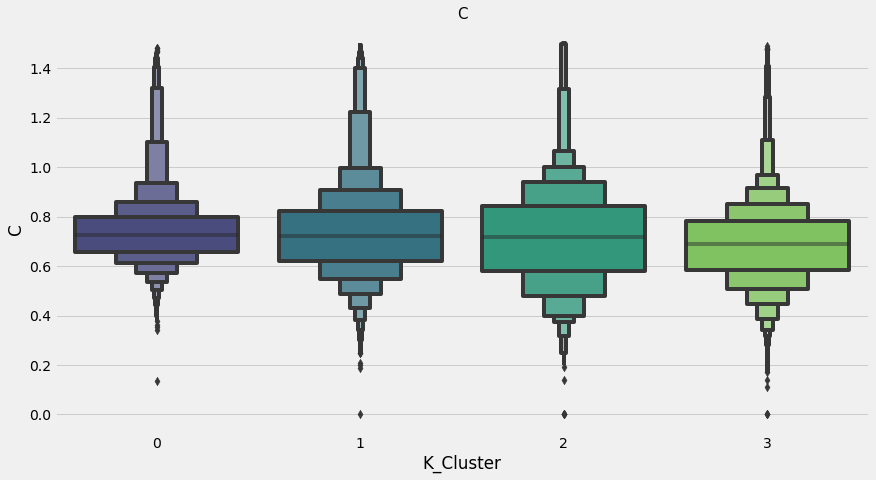

In [ ]:
for i in data.columns:
  plt.figure(figsize=(13,7))
  pl = sns.boxenplot(x = data_label['K_Cluster'], y = data_label[i], palette='viridis')
  pl.set_title(i, fontsize=15)
plt.show()

Cluster 0

- (L) Length of joining member: Medium member, higher than 2 and 3. it can be considered as old customer

- (R) Recent Flight: Shortest recency between the other cluster, mostly have flight in recent time

- (F) Flight Count: Customer with the highest flight count

- (M) Miles Accumulated: Has the highest sum of flight distance

- (C) Discount used: the difference is not too significant between the other cluster


Cluster 1:

- (L) Length of joining member: senior member, highest than other clusters.

- (R) Recent Flight: short recency (similar with cluster 3), mostly have flight in recent time

- (F) Flight Count: Medium flight frequency (similar with cluster 3)

- (M) Miles Accumulated: Has the second highest sum of flight distance (similar with cluster 3)

- (C) Discount used: the difference is not too significant between the other cluster




Cluster 2:

- (L) Length of joining member: junior member, higher than cluster 3, but its considered as junior member

- (R) Recent Flight: Haven't flight for the longest time.

- (F) Flight Count: lowest flight frequency

- (M) Miles Accumulated: the lowest miles accumulated flight

- (C) Discount used: the difference is not too significant between the other cluster


Cluster 3:

- (L) Length of joining member: junior member, the newest member who regeistered their name as a customers

- (R) Recent Flight: short recency (similar with cluster 1), mostly have flight in recent time

- (F) Flight Count: Medium fligh frequency (similar with cluster 1)

- (M) Miles Accumulated: Has the second highest sum of flight distance (similar with cluster 1)

- (C) Discount used: the difference is not too significant between the other cluster


## Business Recomendation

- Among 4 type of clusters, cluster 3 shows highest unique customer value since it is dominated by newest member who has flight in recent time.
- Suggest discount voucher to be implemented and maximized for cluster 3 since we want to grab this new customers and engage them to become loyal customer by getting more and more flights
-  To minimize the risk of losing customers, we have to pay attention to cluster 2 since they haven't flight for the longest time and we need special care using CRM either email promotion or push notification if they install our airline apps. The kind of promotion that might work for cluster 2 might local or domestic vacation since they consider as the lowest miles accumulated.

- Suppose we want to offer loyalty membership, we can refer to this clustering so that it is targeted properly with classification such as Bronze, Silver, Gold and Platinum (based on accumulated airline miles earning by each of customer)